<h1 align="center"> Custom Visualizations in Matplotlib 

In [1]:
from fredapi import Fred
fred = Fred(api_key = '05871cd0f022878907be62a7f0839fae')
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from tableau_chart_style import format_tableau_line_chart 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def get_fred_data(fred_id):
    x =  fred.get_series(fred_id)
    x.info = fred.get_series_info(fred_id)
    return x

In [3]:
lfpr = get_fred_data('CIVPART')
unemp = get_fred_data('UNRATE')
lfpr_men = get_fred_data('LNS11300001')
lfpr_women = get_fred_data('LNS11300002')
lfpr_25_55 = get_fred_data('LNS11300060')
lfpr_55_over = get_fred_data('LNS11324230')

In [4]:
df = pd.concat([lfpr, lfpr_men,lfpr_women,lfpr_25_55,lfpr_55_over],axis=1)
df.columns = ['Labor_Force_Participation','LFPR Men', 'LFPR Women','LFPR 25 to 55 years old', 'LFPR 55 years old and over']

In [5]:
df.to_csv('df.csv')

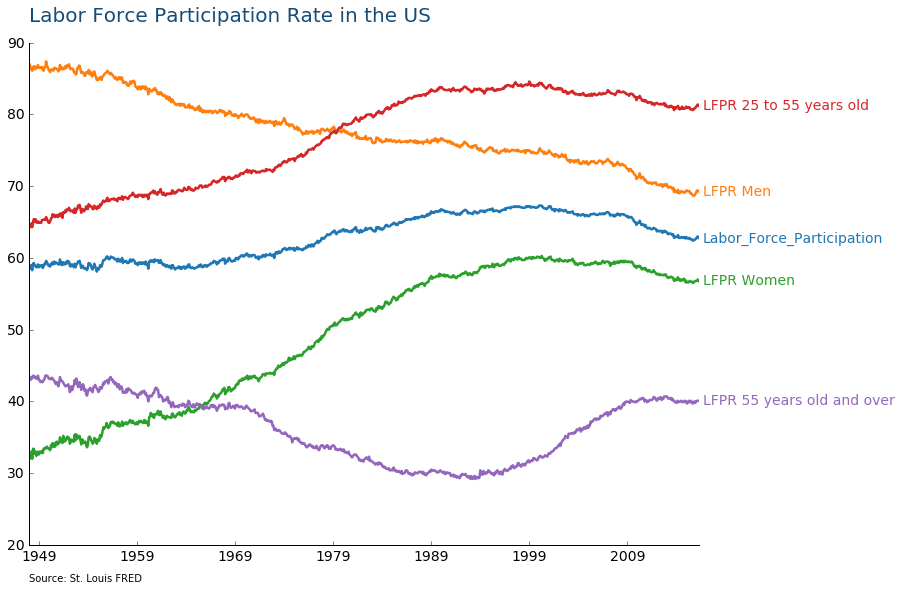

In [6]:
fig = format_tableau_line_chart(df,title='Labor Force Participation Rate in the US' , note = 'Source: St. Louis FRED')

In [7]:
import numpy as np
import plotly.plotly as py

py.iplot_mpl(fig)

TypeError: Cannot compare type 'Timestamp' with type 'str'

In [ ]:
# %load tableau_chart_style
def format_tableau_line_chart(df, index=True, width=13,height=5.5,title='', subtitle='',note='', \
                              title_font_size=16,axis_font_size=13,legend_loc='', title_shift=0, note_shift=0, gridlines=''):
    
    import matplotlib.pyplot as plt  
  
    title_color = (21/255.,75/255.,119/255.)
     # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180),  (255, 127, 14),     
                 (44, 160, 44), (214, 39, 40),     
                 (148, 103, 189),(140, 86, 75),  
                 (227, 119, 194), (127, 127, 127),    
                 (188, 189, 34),  (23, 190, 207),
                 (174, 199, 232),(255, 187, 120),
                 (152, 223, 138),(255, 152, 150),
                 (197, 176, 213), (196, 156, 148),
                 (247, 182, 210),(199, 199, 199),
                (219, 219, 141), (158, 218, 229),]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)    

  
    fig = plt.figure(figsize=(12, 9))    

    # Remove the plot frame lines. They are unnecessary chartjunk.    
    #subplot 111 indicates no subplots
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    #ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    #ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()    

    
    # Make sure your axis ticks are large enough to be easily read.    
    # You don't want your viewers squinting to read your plot.    
    # plt.yticks(range(0, 91, 10), [str(x) + "%" for x in range(0, 91, 10)], fontsize=14)    
    plt.xticks(fontsize=14)    
    plt.yticks(fontsize=14)
    
    # Provide tick lines across the plot to help your viewers trace along    
    # the axis ticks. Make sure that the lines are light and small so they    
    # don't obscure the primary data lines.    
    #for y in range(10, 91, 10):    
    #    plt.plot(range(1968, 2012), [y] * len(range(1968, 2012)), "--", lw=0.5, color="black", alpha=0.3)    

    # Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
    plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on")    

    cols = df.columns   

    for rank, column in enumerate(cols):    
        # Plot each line separately with its own color, using the Tableau 20    
        # color set in order.    
        plt.plot(df.index,    
                df[column].values,    
                lw=2.5, color=tableau20[rank])    

        # Add a text label to the right end of every line. Most of the code below    
        # is adding specific offsets y position because some labels overlapped.    
        y_pos = df[column].values[-1] - 0.5    
        #if column == "Foreign Languages":    
        #    y_pos += 0.5    
        #elif column == "English":    
        #    y_pos -= 0.5    
  
        
        # Again, make sure that all labels are large enough to be easily read    
        # by the viewer.    
        plt.text(max(df.index) + 5, y_pos, column, fontsize=14, color=tableau20[rank])    



    # Note that if the title is descriptive enough, it is unnecessary to include    
    # axis labels; they are self-evident, in this plot's case.    
    plt.text(min(df.index), max(ax.get_ylim()) + 3, title, fontsize=20, color=title_color,ha="left")    

    
    if note <> '': 
        plt.text(min(df.index), min(ax.get_ylim())-5, note, fontsize=10)    

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()   
    # Finally, save the figure as a PNG.    
    # You can also save it as a PDF, JPEG, etc.    
    # Just change the file extension in this call.    
    # bbox_inches="tight" removes all the extra whitespace on the edges of your plot.    
    plt.savefig("chart.png", bbox_inches="tight")  
    
    return fig